In [1]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

import numpy as np

import matplotlib.pyplot as plt

from osgeo import gdal
from scipy import fftpack
import scipy.signal as ss

import numpy.linalg as npl

<ipython-input-2-b98b41a580c5>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(ds_band3),vmin=-40,vmax=0)


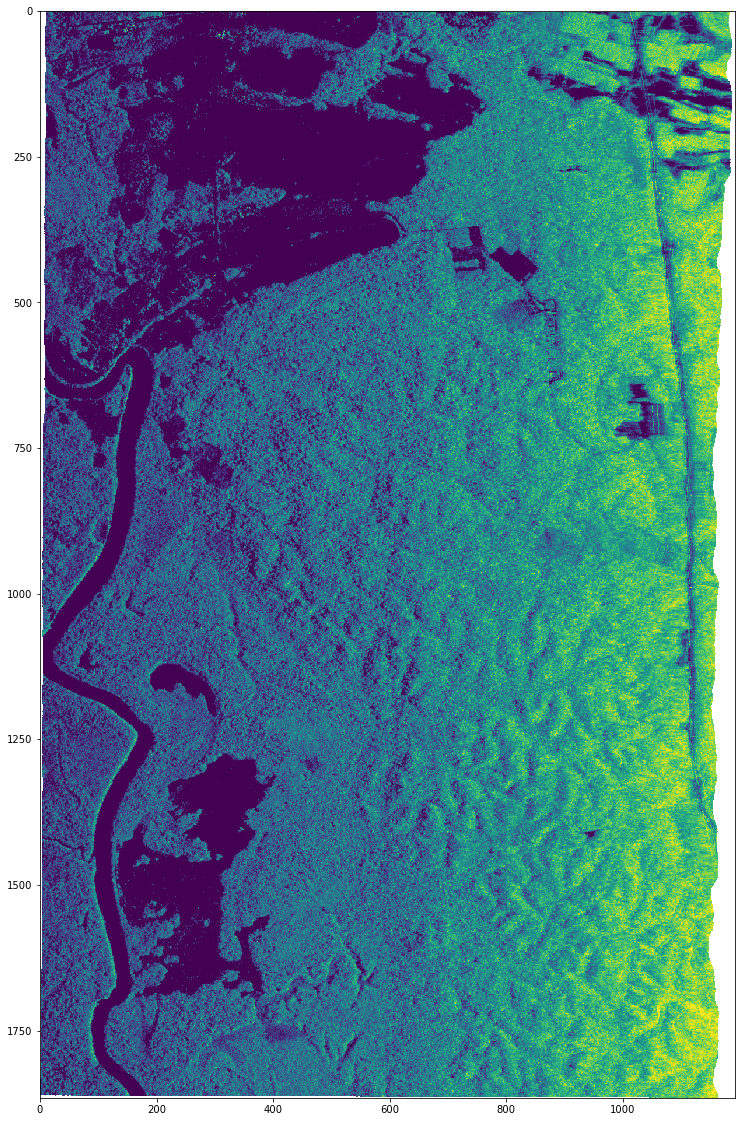

In [2]:
gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())
plt.figure(figsize=(16,20))
plt.imshow(10*np.log(ds_band3),vmin=-40,vmax=0)
#plt.colorbar()
plt.show()

4.8664274
4


<ipython-input-3-4f332c92360d>:3: RuntimeWarning: divide by zero encountered in log
  snippet1 = 10*np.log(ds_band1[x,:])
<ipython-input-3-4f332c92360d>:4: RuntimeWarning: divide by zero encountered in log
  snippet3 = 10*np.log(ds_band3[x,:])
<ipython-input-3-4f332c92360d>:5: RuntimeWarning: invalid value encountered in subtract
  diff = np.abs(snippet1-snippet3)


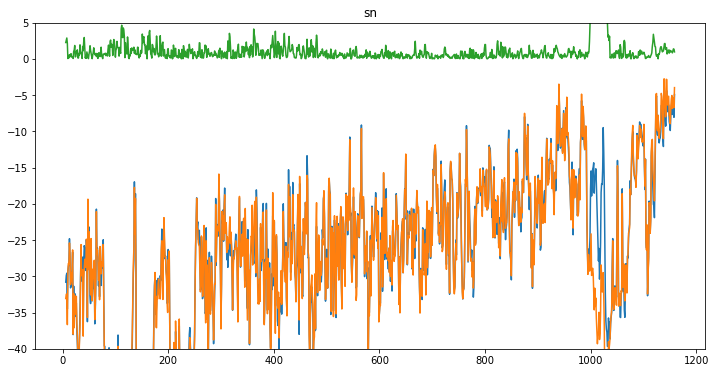

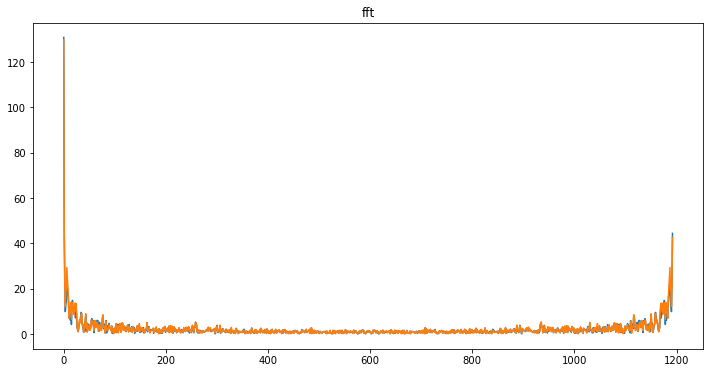

In [3]:

x=712
print(np.max(ds_band1)) 
snippet1 = 10*np.log(ds_band1[x,:])
snippet3 = 10*np.log(ds_band3[x,:])
diff = np.abs(snippet1-snippet3)
print(ds.RasterCount)
fft_snippet1 = np.abs((fftpack.fft(ds_band1[x,:])))
fft_snippet3 = np.abs(fftpack.fft(ds_band3[x,:]))
plt.figure(figsize=(12,6))
plt.plot(snippet1)
plt.ylim(-40,5)

plt.plot(snippet3)
plt.plot(np.abs(diff))

plt.title("sn")
plt.show()
plt.figure(figsize=(12,6))
plt.plot((fft_snippet1))
plt.plot(fft_snippet3)
plt.plot(np.abs(fftpack.fft(diff)))
plt.title("fft")
plt.show()


<ipython-input-4-b0afbf0da8a9>:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t,f,10*np.log(np.abs(z)))


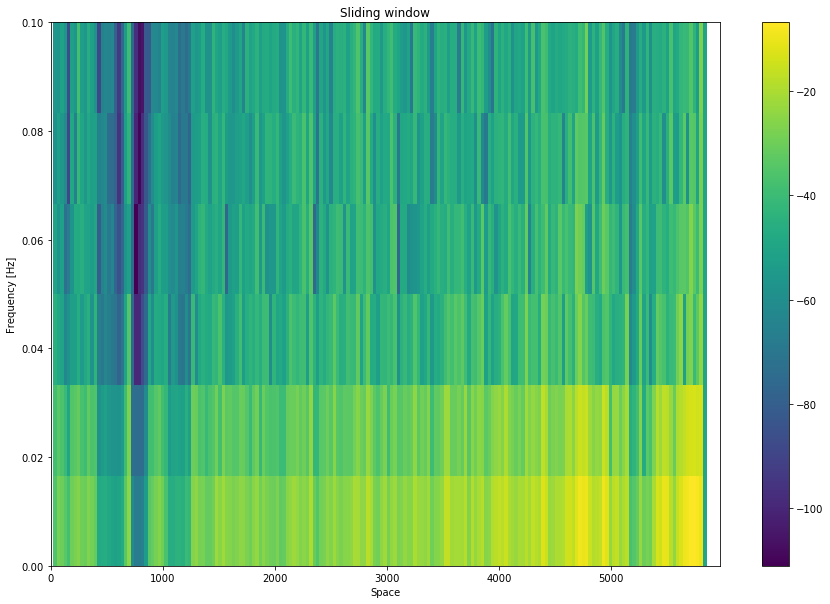

In [4]:
f,t,z=ss.stft(ds_band1[x,:],fs=1/5,nperseg=12)
plt.figure(figsize=(15,10))
plt.pcolormesh(t,f,10*np.log(np.abs(z)))
plt.title("Sliding window")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Space")

plt.colorbar()
plt.show()




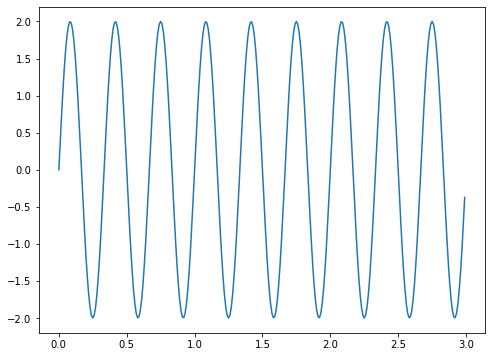

8.0
3.0


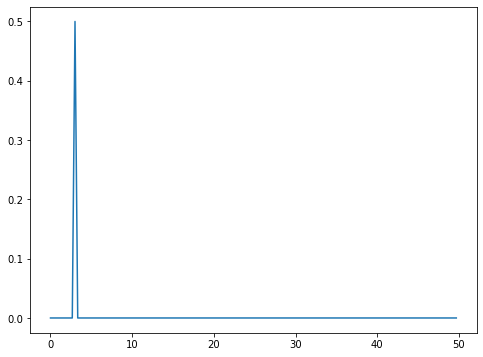

In [5]:
fs = 100
N = 1/fs
T = 3
t = np.arange(0,T,N)
fy = 2*np.sin(2*np.pi*3*t)
plt.figure(figsize=(8,6))
plt.plot(t,fy)
plt.show()
tf_fy=np.fft.fft(fy)/(2*len(fy))
tf_fy = tf_fy[:int(len(tf_fy)/2)]
tpCount     = len(fy)

values      = np.arange(int(tpCount/2))

T = tpCount/fs

frequencies = values/T
plt.figure(figsize=(8,6))
plt.plot(frequencies,np.abs(tf_fy))
n=np.argmax(np.abs(tf_fy))
fn = ((n-1)*fs/2)/(fs/2)
print(fn)
print(frequencies[n])

In [6]:
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(x,y)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()



TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

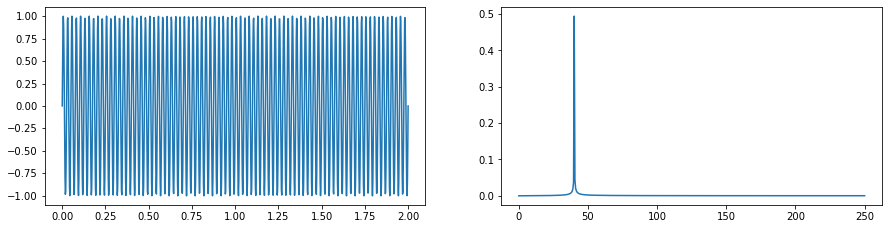

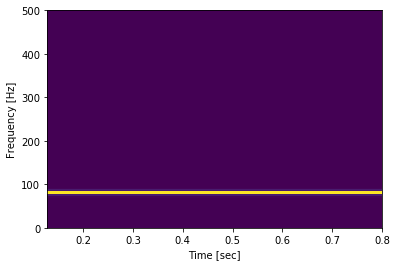

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
fs = 1000 # Sampling frequency /sampling rate
dt = 1/fs #  pas d'echantionllala frequency
def fonc(freq,x):
    yf = np.zeros(len(x))
    for i in range(len(x)):
        yf[i] = np.sin(2*np.pi*freq[i]*x[i])
    return yf
w = 2*np.pi*40  # signal frequency : 3Hz
signal_start = 0
signal_end = 2

x = np.linspace(signal_start,signal_end,fs) #time 
y = np.sin(w*x)
xf = np.linspace(0,1*fs/2,fs//2)/signal_end # f = (n-1) SR/N 
yf = np.fft.fft(y)[:len(y)//2]/len(y)

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.subplot(2,2,2)
plt.plot(xf,np.abs(yf))
plt.show()
f, t, Sxx = ss.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

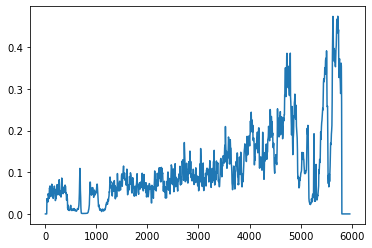

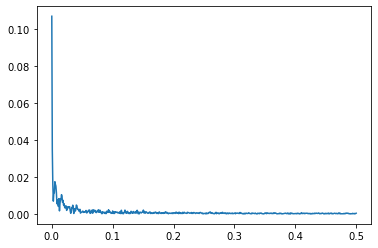

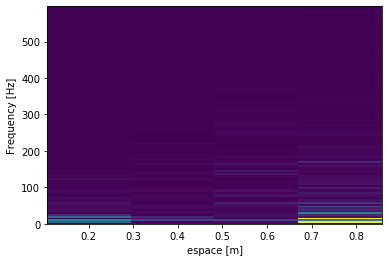

In [8]:
bande_finale = np.zeros(len(ds_band1[100,:]))
for i in range(712,728):
    bande_finale = ds_band1[i,:]+bande_finale
bande_finale = bande_finale/16

fs = len(bande_finale)

x = np.linspace(0,fs*5,fs)
xf = np.linspace(0,1*fs/2,fs//2)/len(x)
yf = np.fft.fft(bande_finale)[:len(bande_finale)//2]/len(bande_finale)
ds = 1/fs
plt.plot(x,bande_finale)
plt.show()
plt.plot(xf,np.abs(yf))
plt.show()

f, t, Sxx = ss.spectrogram(bande_finale, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('espace [m]')
plt.show()